In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

In [55]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (
    sample_data_folder / "MEG" / "sample" / r"C:\Users\avant\Downloads\test_eeg.edf")
raw = mne.io.read_raw(sample_data_raw_file)

Extracting EDF parameters from C:\Users\avant\Downloads\test_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [56]:
print(raw)
print(raw.info)

<RawEDF | test_eeg.edf, 3 x 117355000 (234710.0 s), ~8 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Activity, EEG, EMG
 chs: 3 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2020-09-13 17:10:28 UTC
 nchan: 3
 projs: []
 sfreq: 500.0 Hz
>


In [79]:
raw.info['bads'] = ['Activity', 'EMG']

In [81]:
selection = mne.read_vectorview_selection('EEG')
picks = mne.pick_types(raw.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads', selection=selection)

In [118]:
#mne.filter.filter_data(data, sfreq=500, l_freq=1, h_freq=300,n_jobs=None, picks='EEG', iir_params=None, copy=None, verbose=None,*, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto', method='fir', phase='zero')

SyntaxError: iterable argument unpacking follows keyword argument unpacking (4168362382.py, line 1)

Effective window size : 4.096 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_10288\2728020678.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=250).plot(picks='EEG', exclude='bads')
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


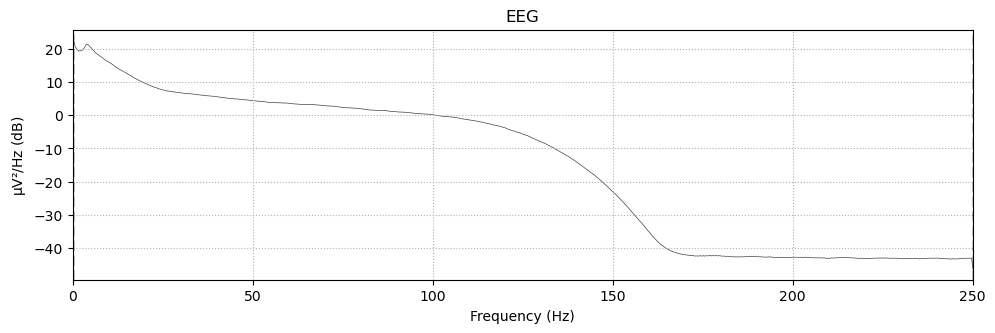

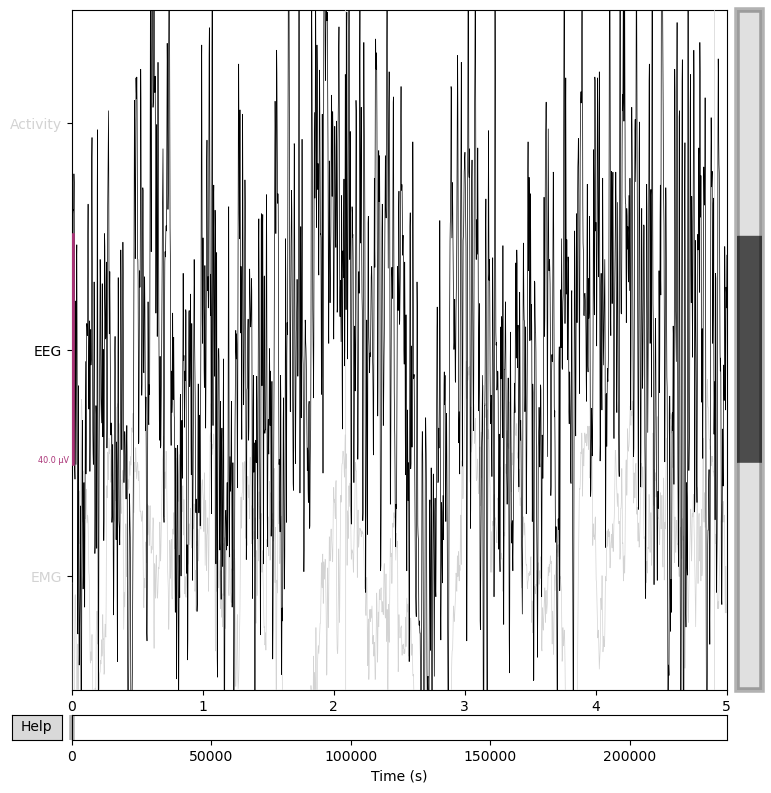

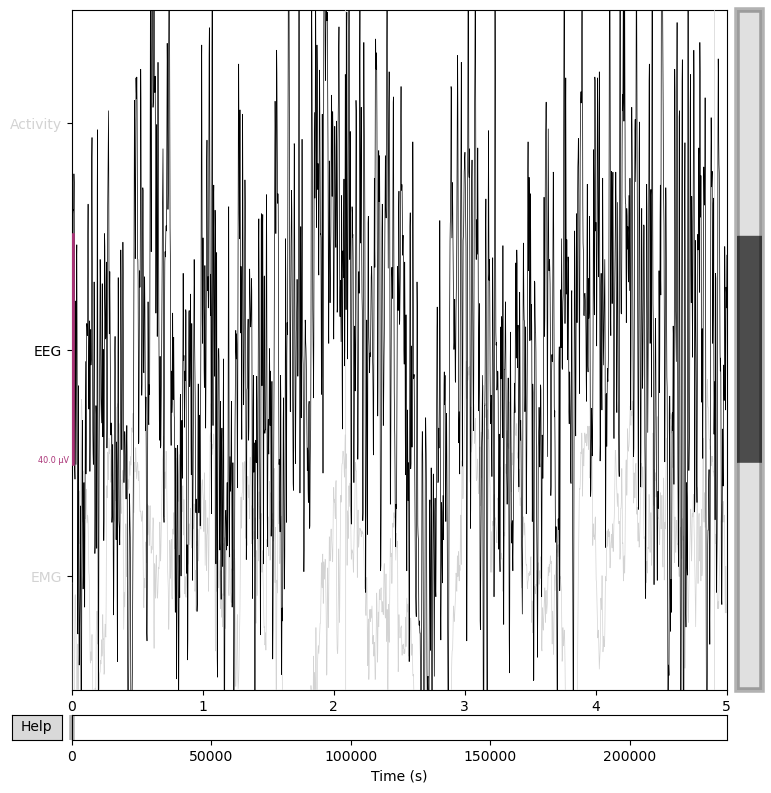

In [87]:
raw.compute_psd(fmax=250).plot(picks='EEG', exclude='bads')
raw.plot(duration=5, n_channels=3)

In [128]:
# Filter settings
low_cut = 0.1
hi_cut  = 50

raw_filt = raw.copy().filter(low_cut, hi_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished


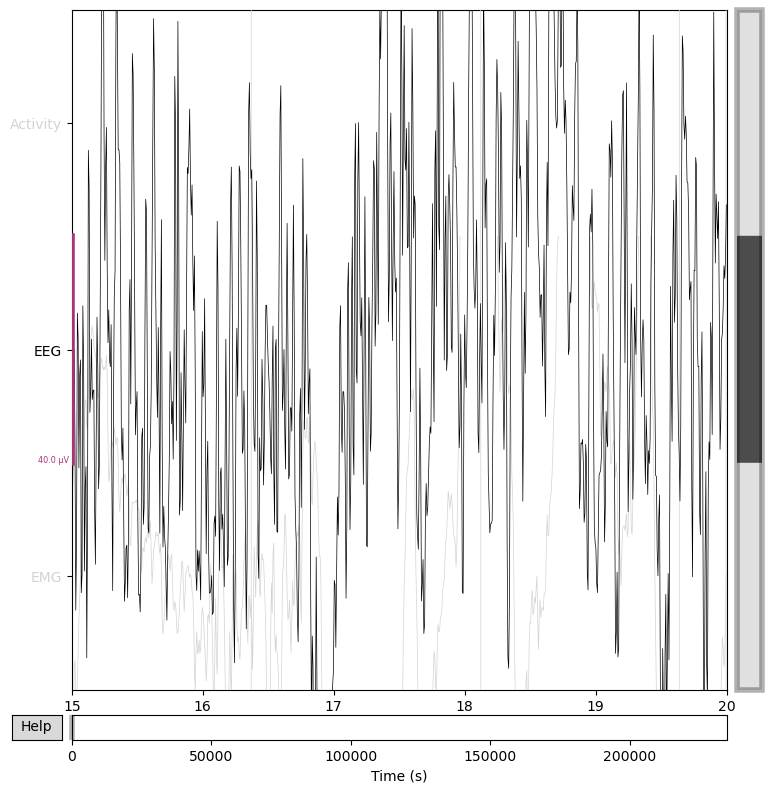

In [133]:
raw_filt.plot(start=15, duration=5);

In [129]:
raw.plot_psd(area_mode='range', tmax=10.0, picks='EEG', average=False);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_10288\3186250760.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks='EEG', average=False);
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [110]:

montage = mne.channels.read_dig_*(kind='test_eeg', ch_names=None, path=r'C:\Users\avant\Downloads\test_eeg.edf', unit='m',transform= 'False' )
print(montage)

raw.set_montage(montage, set_dig=True)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3227480613.py, line 1)

In [70]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=3, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]
#raw.set_montage('easycap-M1')
ica.plot_properties(raw, picks=ica.exclude)

Fitting ICA to data using 3 channels (please be patient, this may take a while)


C:\Users\avant\AppData\Local\Temp\ipykernel_10288\107708530.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


TypeError: _ArrayMemoryError.__init__() missing 1 required positional argument: 'dtype'

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = [
    "MEG 0111",
    "MEG 0121",
    "MEG 0131",
    "MEG 0211",
    "MEG 0221",
    "MEG 0231",
    "MEG 0311",
    "MEG 0321",
    "MEG 0331",
    "MEG 1511",
    "MEG 1521",
    "MEG 1531",
    "EEG 001",
    "EEG 002",
    "EEG 003",
    "EEG 004",
    "EEG 005",
    "EEG 006",
    "EEG 007",
    "EEG 008",
]
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)